# _automaton_.determinize

Compute the (accessible part of the) determinization of an automaton.

Preconditions:
- its labelset is free
- its weightset features a division operator (which is the case for $\mathbb{B}$).

Postconditions:
- the result is deterministic
- the result is equivalent to the input automaton
- the result is accessible
- the result need not be complete

Caveats:
- might not terminate if the weightset is not $\mathbb{B}$ (see [automaton.has_twins_property](automaton.has_twins_property.ipynb))

See also:
- [automaton.has_twins_property](automaton.has_twins_property.ipynb)
- [automaton.is_deterministic](automaton.is_deterministic.ipynb)

## Examples

### Ladybird

Ladybird is a well known example that shows the exponential growth on the number of resulting states.

:0: FutureWarning: IPython widgets are experimental and may change in the future.


<IPython.core.display.Javascript object>

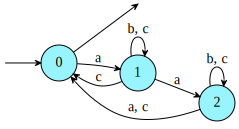

In [1]:
import vcsn
lady4 = vcsn.context('lal_char(abc), b').ladybird(3)
lady4

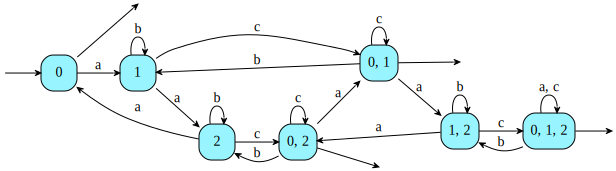

In [2]:
lady4d = lady4.determinize()
lady4d

The resulting automaton has states labeled with subsets of the input automaton set of states.

### Empty input

If the input automaton has an empty accessible part (i.e., it has no initial state), then the output is empty (which is genuinely displayed as nothing below).

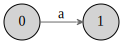

In [3]:
%%automaton a
context = "lal_char(a), b"
0 -> 1 a

In [4]:
a.determinize()

### Weighted automata

The algorithm we use requires a division operator.  The following example has weights in $\mathbb{Q}$ (and was chosen because the algorithm terminates on it).

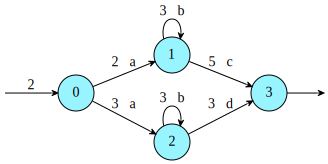

In [5]:
%%automaton a
context = "lal_char, q"
$ -> 0 <2>
0 -> 1 <2>a
0 -> 2 <3>a
1 -> 1 <3>b
1 -> 3 <5>c
2 -> 2 <3>b
2 -> 3 <3>d
3 -> $

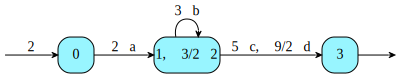

In [6]:
d = a.determinize()
d

Which is obviously deterministic.  Of course they are equivalent:

In [7]:
a.is_equivalent(d)

True

The next example works in $\mathbb{Z}_{\min}$, which features a division: the usual subtraction.

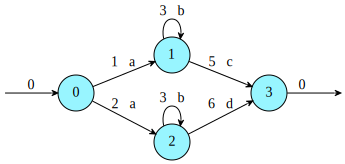

In [8]:
%%automaton a
context = "lal_char, zmin"
$ -> 0 <0>
0 -> 1 <1>a
0 -> 2 <2>a
1 -> 1 <3>b
1 -> 3 <5>c
2 -> 2 <3>b
2 -> 3 <6>d
3 -> $ <0>

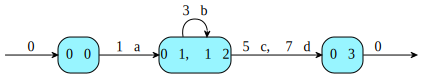

In [9]:
d = a.determinize()
d

Of course, they are equivalent.  However we cannot use [automaton.is_equivalent](automaton.is_equivalent.ipynb) here.

In [10]:
a.shortest(10)

<6>ac + <8>ad + <9>abc + <11>abd + <12>abbc + <14>abbd + <15>abbbc + <17>abbbd + <18>abbbbc + <20>abbbbd

In [11]:
d.shortest(10)

<6>ac + <8>ad + <9>abc + <11>abd + <12>abbc + <14>abbd + <15>abbbc + <17>abbbd + <18>abbbbc + <20>abbbbd

## Caveats
Some weighted automata cannot be determinized.  See [automaton.has_twins_property](automaton.has_twins_property.ipynb) for a possible means to detect whether the procedure will terminate.

The following automaton, for example, admits no equivalent deterministic automaton.

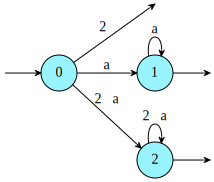

In [12]:
vcsn.context('lal_char, q').expression('a*+(<2>a)*').automaton()